In [ ]:
%%sh
pip install -q --upgrade pip
pip install -q --upgrade diffusers transformers scipy ftfy huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.1 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login

# Required to get access to stable diffusion model
notebook_login()

In [ ]:
!pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
# pipeline = pipeline.to("cuda")
pipeline.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
import os

from IPython.display import Image, display


def generate_images(
    prompt,
    num_images_to_generate,
    num_images_per_prompt=4,
    guidance_scale=8,
    output_dir="images",
    display_images=False,
):

    num_iterations = num_images_to_generate // num_images_per_prompt
    os.makedirs(output_dir, exist_ok=True)

    for i in range(num_iterations):
        images = pipeline(
            prompt, num_images_per_prompt=num_images_per_prompt, guidance_scale=guidance_scale
        )
        for idx, image in enumerate(images.images):
            image_name = f"{output_dir}/image_{(i*num_images_per_prompt)+idx}.png"
            image.save(image_name)
            if display_images:
                display(Image(filename=image_name, width=128, height=128))

  0%|          | 0/50 [00:00<?, ?it/s]

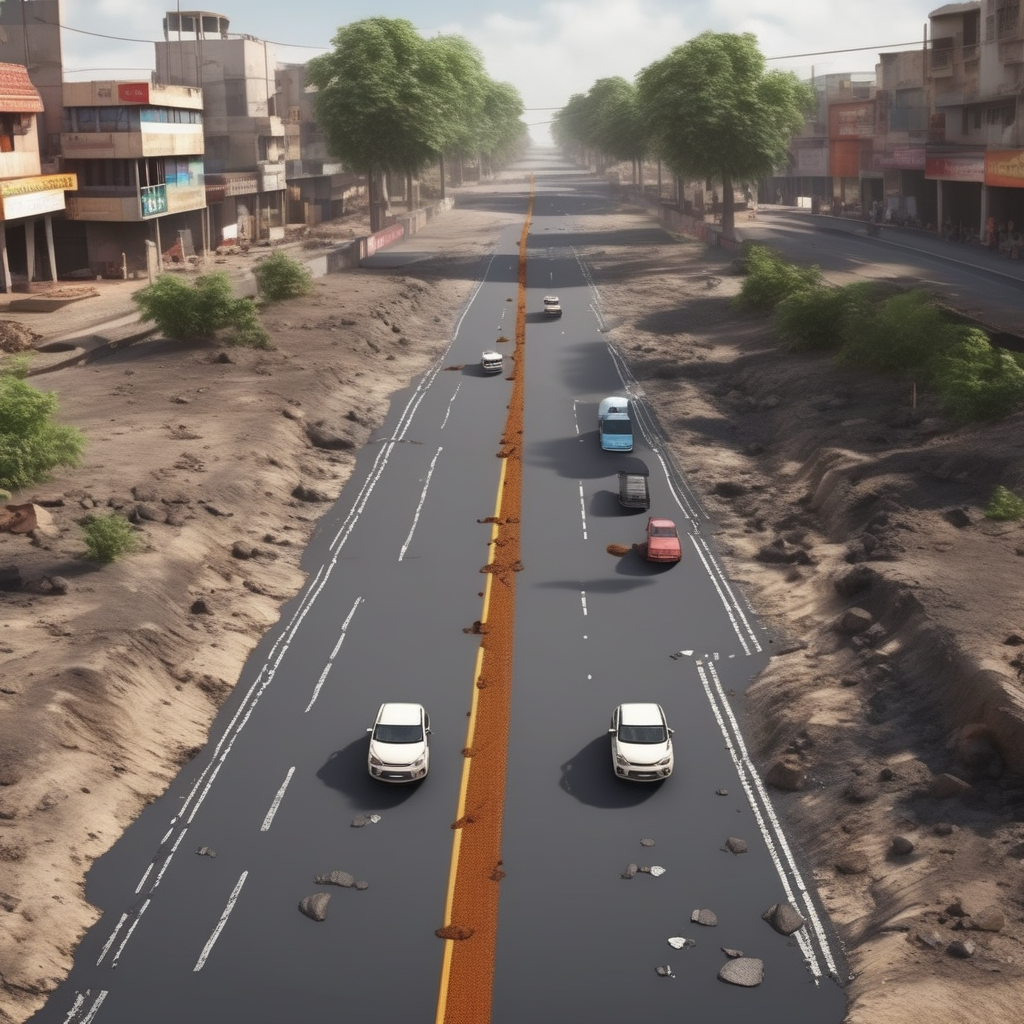

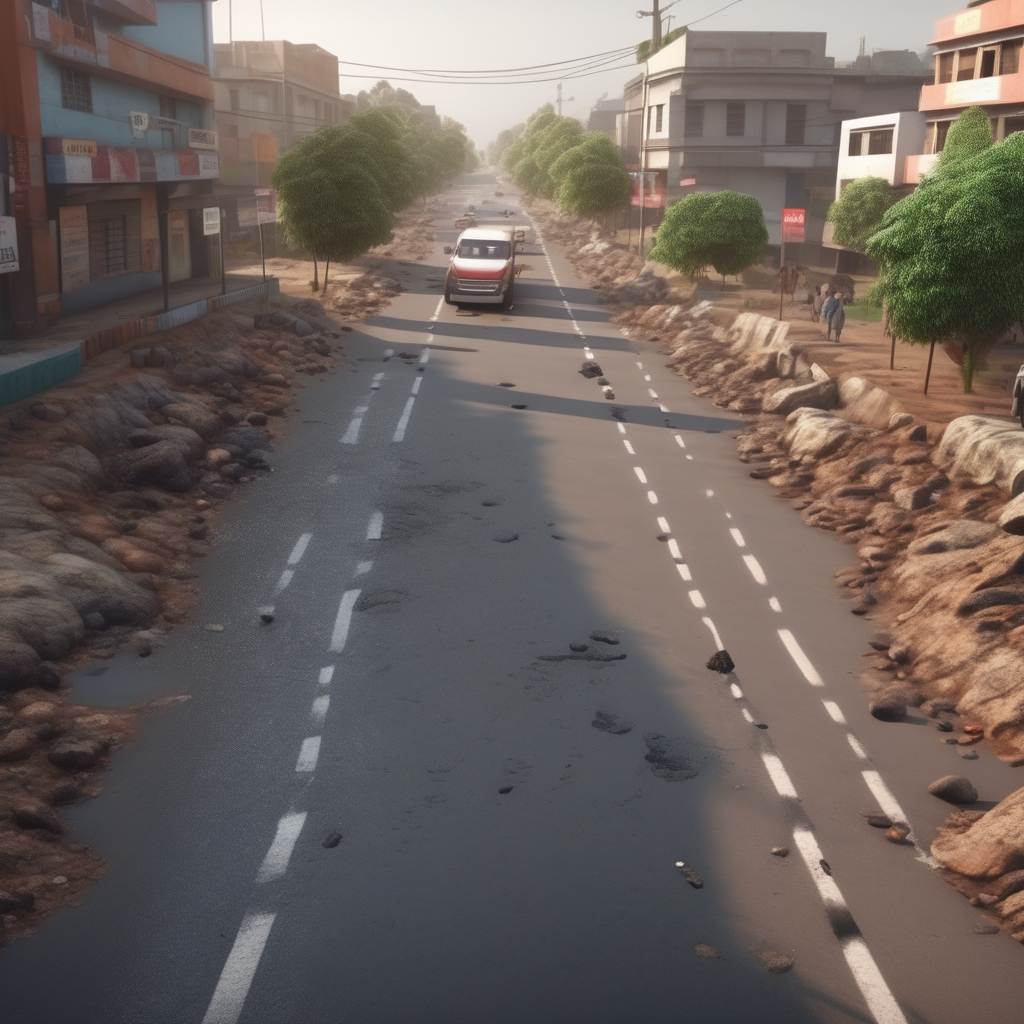

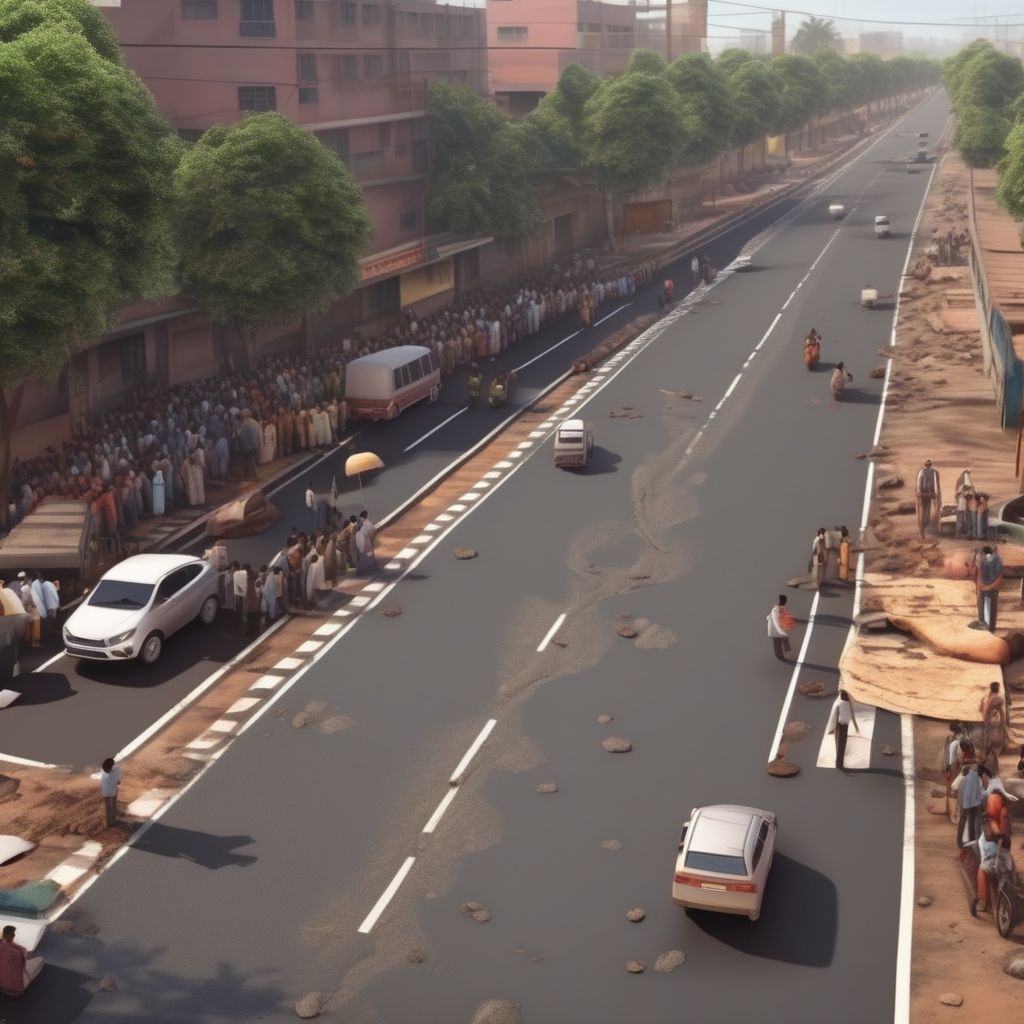

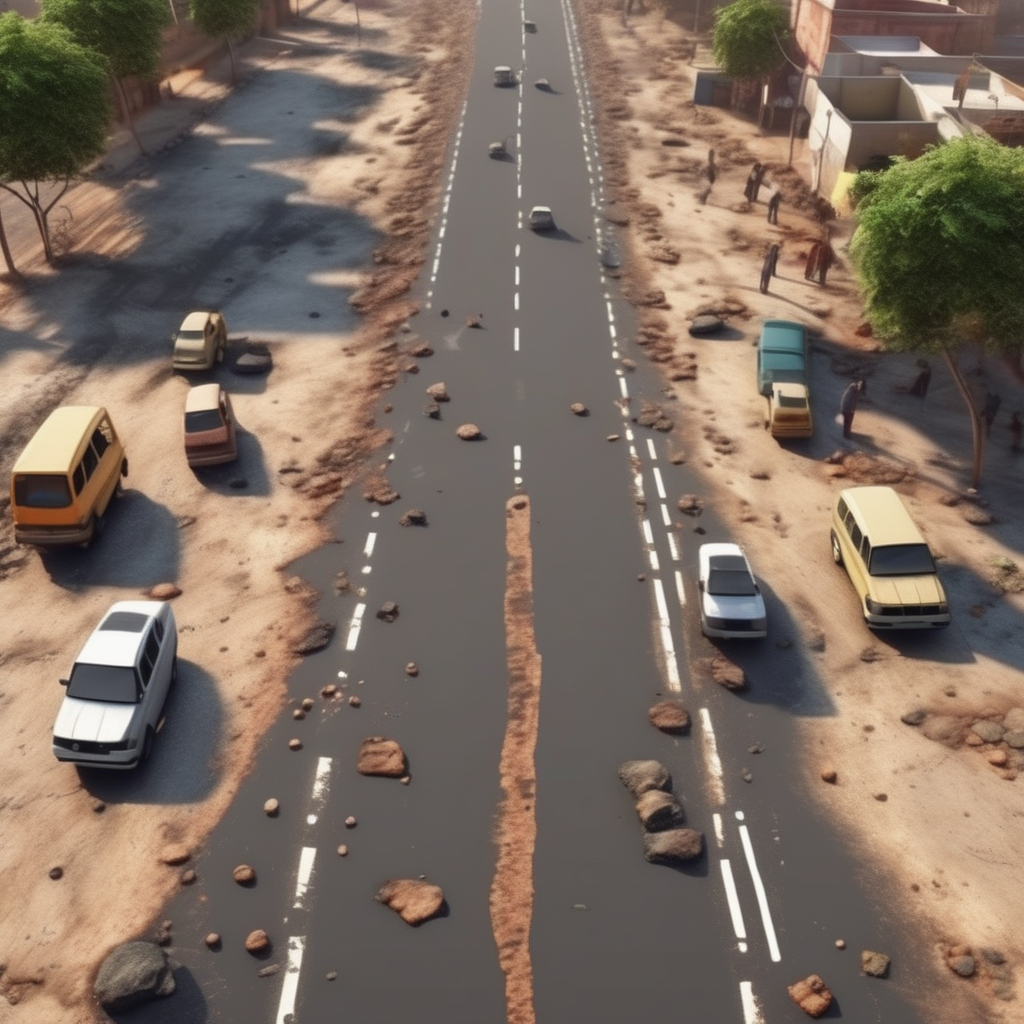

In [ ]:
generate_images("photorealistic indian road with potholes, crowd and cars", 4, guidance_scale=8, display_images=True)